## 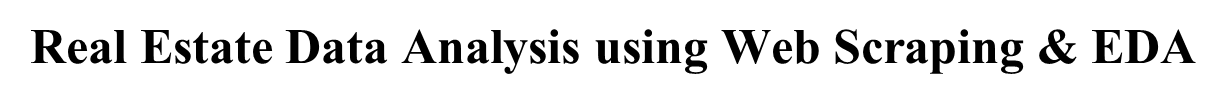

In [1]:
pip install requests beautifulsoup4 pandas numpy selenium lxml

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached urllib3-2.6.3-py3-none-any.whl.metadata (6.9 kB)
Using cached urllib3-2.6.3-py3-none-any.whl (131 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.20
    Uninstalling urllib3-1.26.20:
      Successfully uninstalled urllib3-1.26.20


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyppeteer 2.0.0 requires pyee<12.0.0,>=11.0.0, but you have pyee 13.0.0 which is incompatible.
pyppeteer 2.0.0 requires urllib3<2.0.0,>=1.25.8, but you have urllib3 2.6.3 which is incompatible.


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import time
import random

HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept-Language": "en-US,en;q=0.9"
}

def scrape_magicbricks(city="hyderabad", start_page=1, end_page=50):
    properties = []

    print(f"Starting multi-page scraping for {city}...")

    for page in range(start_page, end_page + 1):
        print(f"Scraping page {page}...")

        url = f"https://www.magicbricks.com/property-for-sale/residential-real-estate?cityName={city}&page={page}"

        try:
            res = requests.get(url, headers=HEADERS, timeout=10)
            soup = BeautifulSoup(res.text, "lxml")

            cards = soup.select(".mb-srp__card")

            if not cards:
                print(f"No data found on page {page}, stopping...")
                break

            for card in cards:
                try:
                    title = card.select_one(".mb-srp__card--title").text.strip()
                except:
                    title = None

                try:
                    price = card.select_one(".mb-srp__card__price--amount").text.strip()
                except:
                    price = None

                try:
                    area = card.select_one(".mb-srp__card__summary--value").text.strip()
                except:
                    area = None

                try:
                    location = card.select_one(".mb-srp__card--address").text.strip()
                except:
                    location = None

                try:
                    builder = card.select_one(".mb-srp__card__society").text.strip()
                except:
                    builder = None

                try:
                    prop_type = card.select_one(".mb-srp__card__summary--label").text.strip()
                except:
                    prop_type = None

                properties.append({
                    "platform": "MagicBricks",
                    "title": title,
                    "price": price,
                    "area_sqft": area,
                    "location": location,
                    "builder": builder,
                    "property_type": prop_type,
                    "city": city,
                    "scrape_date": datetime.now().strftime("%Y-%m-%d")
                })

            # Anti-blocking delay
            time.sleep(random.uniform(1.5, 3.5))

        except Exception as e:
            print(f"Error on page {page}: {e}")
            continue

    df = pd.DataFrame(properties)
    return df


if __name__ == "__main__":
    df = scrape_magicbricks(city="hyderabad", start_page=1, end_page=50)
    df.to_csv("raw_data_real1.csv", index=False)
    print(f"Scraping completed! Total records: {len(df)}")


Starting multi-page scraping for hyderabad...
Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scr

### Load data

In [11]:
import pandas as pd
# Load data
df = pd.read_csv("raw_data_real1.csv")
print("Initial dataset shape:", df.shape)
print(df.info())

Initial dataset shape: (1500, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   platform       1500 non-null   object 
 1   title          1500 non-null   object 
 2   price          1500 non-null   object 
 3   area_sqft      1500 non-null   object 
 4   location       0 non-null      float64
 5   builder        792 non-null    object 
 6   property_type  1500 non-null   object 
 7   city           1500 non-null   object 
 8   scrape_date    1500 non-null   object 
dtypes: float64(1), object(8)
memory usage: 105.6+ KB
None


In [12]:
df

,platform,title,price,area_sqft,location,builder,property_type,city,scrape_date
0,MagicBricks,Office Space for Sale in Narepally Hyderabad,₹10.21 Cr,5742 sqft,NaN,NaN,Carpet Area,hyderabad,2026-01-25
1,MagicBricks,"4 BHK Flat for Sale in Sobha Waterfront, Somaj...",₹4.50 Cr,3278 sqft,NaN,NaN,Super Area,hyderabad,2026-01-25
2,MagicBricks,"3 BHK Flat for Sale in Rajapushpa Sierra, Tell...",₹1.83 Cr,2555 sqft,NaN,NaN,Super Area,hyderabad,2026-01-25
3,MagicBricks,"3 BHK Flat for Sale in APR Praveens Higheria, ...",₹94.1 Lac,1700 sqft,NaN,APR Praveens Higheria,Super Area,hyderabad,2026-01-25
4,MagicBricks,"5 BHK Flat for Sale in The Marquise, Kokapet, ...",₹11.03 Cr,9635 sqft,NaN,The Marquise,Super Area,hyderabad,2026-01-25
...,...,...,...,...,...,...,...,...,...
1495,MagicBricks,Plot/Land for Sale in Rangapur Shadnagar Hyder...,₹36 Lac,2640 sqft,NaN,Skandhanshi Aarambh,Plot Area,hyderabad,2026-01-25
1496,MagicBricks,Plot/Land for Sale in dandumailaram Hyderabad,₹16 Lac,183 sqyrd,NaN,NaN,Plot Area,hyderabad,2026-01-25
1497,MagicBricks,"3 BHK Flat for Sale in Aditya Athena, Shaikpet...",₹2.10 Cr,2125 sqft,NaN,Aditya Athena,Super Area,hyderabad,2026-01-25
1498,MagicBricks,Plot/Land for Sale in Keesara Bommalaramaram R...,₹20 Lac,285 sqyrd,NaN,NaN,Plot Area,hyderabad,2026-01-25


### Extract Location from Title


In [13]:
import re
# 1. EXTRACT LOCATION FROM TITLE
def extract_location(title):
    if pd.isna(title):
        return None
    
    title = title.lower()
    
    # pattern: "in kokapet", "in gachibowli"
    match = re.search(r"in\s+([a-zA-Z\s]+)", title)
    
    if match:
        return match.group(1).strip().title()
    return None

df["extracted_location"] = df["title"].apply(extract_location)

# Replace location column with extracted one
df["location"] = df["extracted_location"]

# Drop helper column
df.drop(columns=["extracted_location"], inplace=True)
print("Location extracted Successfully.")

Location extracted Successfully.


In [14]:
df

,platform,title,price,area_sqft,location,builder,property_type,city,scrape_date
0,MagicBricks,Office Space for Sale in Narepally Hyderabad,₹10.21 Cr,5742 sqft,Narepally Hyderabad,NaN,Carpet Area,hyderabad,2026-01-25
1,MagicBricks,"4 BHK Flat for Sale in Sobha Waterfront, Somaj...",₹4.50 Cr,3278 sqft,Sobha Waterfront,NaN,Super Area,hyderabad,2026-01-25
2,MagicBricks,"3 BHK Flat for Sale in Rajapushpa Sierra, Tell...",₹1.83 Cr,2555 sqft,Rajapushpa Sierra,NaN,Super Area,hyderabad,2026-01-25
3,MagicBricks,"3 BHK Flat for Sale in APR Praveens Higheria, ...",₹94.1 Lac,1700 sqft,Apr Praveens Higheria,APR Praveens Higheria,Super Area,hyderabad,2026-01-25
4,MagicBricks,"5 BHK Flat for Sale in The Marquise, Kokapet, ...",₹11.03 Cr,9635 sqft,The Marquise,The Marquise,Super Area,hyderabad,2026-01-25
...,...,...,...,...,...,...,...,...,...
1495,MagicBricks,Plot/Land for Sale in Rangapur Shadnagar Hyder...,₹36 Lac,2640 sqft,Rangapur Shadnagar Hyderabad,Skandhanshi Aarambh,Plot Area,hyderabad,2026-01-25
1496,MagicBricks,Plot/Land for Sale in dandumailaram Hyderabad,₹16 Lac,183 sqyrd,Dandumailaram Hyderabad,NaN,Plot Area,hyderabad,2026-01-25
1497,MagicBricks,"3 BHK Flat for Sale in Aditya Athena, Shaikpet...",₹2.10 Cr,2125 sqft,Aditya Athena,Aditya Athena,Super Area,hyderabad,2026-01-25
1498,MagicBricks,Plot/Land for Sale in Keesara Bommalaramaram R...,₹20 Lac,285 sqyrd,Keesara Bommalaramaram Road Hyderabad,NaN,Plot Area,hyderabad,2026-01-25


#### Title extraction

In [15]:
import re
def extract_title(title):
    if pd.isna(title):
        return None
    
    title = title.lower()
    
    # pattern: "in kokapet", "in gachibowli"
    match = re.search(r"^.*?(?=\sfor\b)", title)
    
    if match:
        return match.group()
    return None

df["extracted_title"] = df["title"].apply(extract_title)

# Replace location column with extracted one
df["title"] = df["extracted_title"]

# Drop helper column
df.drop(columns=["extracted_title"], inplace=True)
print("Title extracted Successfully.")

Title extracted Successfully.


In [16]:
df

,platform,title,price,area_sqft,location,builder,property_type,city,scrape_date
0,MagicBricks,office space,₹10.21 Cr,5742 sqft,Narepally Hyderabad,NaN,Carpet Area,hyderabad,2026-01-25
1,MagicBricks,4 bhk flat,₹4.50 Cr,3278 sqft,Sobha Waterfront,NaN,Super Area,hyderabad,2026-01-25
2,MagicBricks,3 bhk flat,₹1.83 Cr,2555 sqft,Rajapushpa Sierra,NaN,Super Area,hyderabad,2026-01-25
3,MagicBricks,3 bhk flat,₹94.1 Lac,1700 sqft,Apr Praveens Higheria,APR Praveens Higheria,Super Area,hyderabad,2026-01-25
4,MagicBricks,5 bhk flat,₹11.03 Cr,9635 sqft,The Marquise,The Marquise,Super Area,hyderabad,2026-01-25
...,...,...,...,...,...,...,...,...,...
1495,MagicBricks,plot/land,₹36 Lac,2640 sqft,Rangapur Shadnagar Hyderabad,Skandhanshi Aarambh,Plot Area,hyderabad,2026-01-25
1496,MagicBricks,plot/land,₹16 Lac,183 sqyrd,Dandumailaram Hyderabad,NaN,Plot Area,hyderabad,2026-01-25
1497,MagicBricks,3 bhk flat,₹2.10 Cr,2125 sqft,Aditya Athena,Aditya Athena,Super Area,hyderabad,2026-01-25
1498,MagicBricks,plot/land,₹20 Lac,285 sqyrd,Keesara Bommalaramaram Road Hyderabad,NaN,Plot Area,hyderabad,2026-01-25


In [17]:
import re
import numpy as np

def convert_indian_price(value):
    if pd.isna(value):
        return np.nan

    value = str(value).lower().replace(",", "").strip()

    # Crores
    if "cr" in value:
        number = re.findall(r"[\d.]+", value)[0]
        return float(number) * 10_000_000

    # Lakhs
    if "lac" in value or "lakh" in value:
        number = re.findall(r"[\d.]+", value)[0]
        return float(number) * 100_000

    # If already numeric
    return float(value)

In [18]:
df["price_numeric"] = df["price"].apply(convert_indian_price)

# Replace price column with extracted one
df["price"] = df["price_numeric"]

# Drop helper column
df.drop(columns=["price_numeric"], inplace=True)
print("Price converted Successfully.")

Price converted Successfully.


#### Cleaning the data

In [19]:
# 2. CLEAN PRICE
df["price"] = df["price"].astype(str)
df["price"] = df["price"].str.replace("₹", "", regex=False)
df["price"] = df["price"].str.replace(",", "", regex=False)
df["price"] = df["price"].str.extract("(\d+)")

df["price"] = pd.to_numeric(df["price"], errors="coerce")

# 3. CLEAN AREA
df["area_sqft"] = df["area_sqft"].astype(str)
df["area_sqft"] = df["area_sqft"].str.replace("sqft", "", regex=False)
df["area_sqft"] = df["area_sqft"].str.replace("Sqft", "", regex=False)
df["area_sqft"] = df["area_sqft"].str.extract("(\d+)")

df["area_sqft"] = pd.to_numeric(df["area_sqft"], errors="coerce")

# 4. NORMALIZE TEXT COLUMNS
text_cols = ["platform", "builder", "property_type", "city", "location"]

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

In [20]:
import re
import numpy as np

def convert_indian_price(value):
    if pd.isna(value):
        return np.nan

    value = str(value).lower().replace(",", "").strip()

    # Crores
    if "cr" in value:
        number = re.findall(r"[\d.]+", value)[0]
        return float(number) * 10_000_000

    # Lakhs
    if "lac" in value or "lakh" in value:
        number = re.findall(r"[\d.]+", value)[0]
        return float(number) * 100_000

    # If already numeric
    return float(value)

### Handling missing values

In [21]:
# 5. HANDLE MISSING VALUES

# Location
df["location"] = (df["location"].fillna("Unknown"))

# Builder
df["builder"] = (
    df["builder"]
    .replace(["nan", "NaN","Nan", "None", "null", ""], np.nan)
    .fillna("Unknown")
)

# Price & Area
df = df[df["price"].notna()]
df = df[df["area_sqft"].notna()]

In [22]:
# 6. REMOVE DUPLICATES
df.drop_duplicates(subset=["title", "price", "area_sqft", "location"], inplace=True)

In [26]:
# 7. ADD DERIVED FEATURES

# Price per sqft
df["price_per_sqft"] = df["price"] / df["area_sqft"]

# Budget categorise
bins = [0, 3000000, 10000000, 20000000, 100000000, 600000000]
labels = ["Low Budget", "Affordable", "Mid-Range", "Premium", "Luxury"]

df["budget_category"] = pd.cut(df["price"], bins=bins, labels=labels)


In [1]:
# 8. FINAL CLEAN DATASET

df.to_csv("cleaned_data_real.csv", index=False)

print("Cleaning complete!")
print("Final dataset shape:", df.shape)
print(df.info())

NameError: name 'df' is not defined

In [28]:
df

,platform,title,price,area_sqft,location,builder,property_type,city,scrape_date,price_per_sqft,budget_category
0,Magicbricks,office space,102100000,5742.0,Narepally Hyderabad,Unknown,Carpet Area,Hyderabad,2026-01-25,17781.260885,Luxury
1,Magicbricks,4 bhk flat,45000000,3278.0,Sobha Waterfront,Unknown,Super Area,Hyderabad,2026-01-25,13727.882855,Premium
2,Magicbricks,3 bhk flat,18300000,2555.0,Rajapushpa Sierra,Unknown,Super Area,Hyderabad,2026-01-25,7162.426614,Mid-Range
3,Magicbricks,3 bhk flat,9410000,1700.0,Apr Praveens Higheria,Apr Praveens Higheria,Super Area,Hyderabad,2026-01-25,5535.294118,Affordable
4,Magicbricks,5 bhk flat,110300000,9635.0,The Marquise,The Marquise,Super Area,Hyderabad,2026-01-25,11447.846393,Luxury
...,...,...,...,...,...,...,...,...,...,...,...
1495,Magicbricks,plot/land,3600000,2640.0,Rangapur Shadnagar Hyderabad,Skandhanshi Aarambh,Plot Area,Hyderabad,2026-01-25,1363.636364,Affordable
1496,Magicbricks,plot/land,1600000,183.0,Dandumailaram Hyderabad,Unknown,Plot Area,Hyderabad,2026-01-25,8743.169399,Low Budget
1497,Magicbricks,3 bhk flat,21000000,2125.0,Aditya Athena,Aditya Athena,Super Area,Hyderabad,2026-01-25,9882.352941,Premium
1498,Magicbricks,plot/land,2000000,285.0,Keesara Bommalaramaram Road Hyderabad,Unknown,Plot Area,Hyderabad,2026-01-25,7017.543860,Low Budget


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd
df1 = pd.read_csv("cleaned_data_real.csv")
df1

,platform,title,price,area_sqft,location,builder,property_type,city,scrape_date,price_per_sqft,budget_category
0,Magicbricks,office space,102100000,5742.0,Narepally Hyderabad,Unknown,Carpet Area,Hyderabad,2026-01-25,17781.260885,Luxury
1,Magicbricks,4 bhk flat,45000000,3278.0,Sobha Waterfront,Unknown,Super Area,Hyderabad,2026-01-25,13727.882855,Premium
2,Magicbricks,3 bhk flat,18300000,2555.0,Rajapushpa Sierra,Unknown,Super Area,Hyderabad,2026-01-25,7162.426614,Mid-Range
3,Magicbricks,3 bhk flat,9410000,1700.0,Apr Praveens Higheria,Apr Praveens Higheria,Super Area,Hyderabad,2026-01-25,5535.294118,Affordable
4,Magicbricks,5 bhk flat,110300000,9635.0,The Marquise,The Marquise,Super Area,Hyderabad,2026-01-25,11447.846393,Luxury
...,...,...,...,...,...,...,...,...,...,...,...
1475,Magicbricks,plot/land,3600000,2640.0,Rangapur Shadnagar Hyderabad,Skandhanshi Aarambh,Plot Area,Hyderabad,2026-01-25,1363.636364,Affordable
1476,Magicbricks,plot/land,1600000,183.0,Dandumailaram Hyderabad,Unknown,Plot Area,Hyderabad,2026-01-25,8743.169399,Low Budget
1477,Magicbricks,3 bhk flat,21000000,2125.0,Aditya Athena,Aditya Athena,Super Area,Hyderabad,2026-01-25,9882.352941,Premium
1478,Magicbricks,plot/land,2000000,285.0,Keesara Bommalaramaram Road Hyderabad,Unknown,Plot Area,Hyderabad,2026-01-25,7017.543860,Low Budget


In [4]:
df1.describe()

,price,area_sqft,price_per_sqft
count,1.480000e+03,1480.000000,1.480000e+03
mean,2.074467e+07,1703.967568,8.839290e+04
std,3.237559e+07,1705.643203,1.014957e+06
min,1.000000e+05,1.000000,5.142857e+01
25%,7.200000e+06,855.000000,6.968335e+03
50%,1.295000e+07,1353.000000,9.636553e+03
75%,2.200000e+07,2069.250000,1.449457e+04
max,5.500000e+08,21722.000000,2.200000e+07


In [6]:
df1.describe(include="O")

,platform,title,location,builder,property_type,city,scrape_date,budget_category
count,1480,1480,1478,1480,1480,1480,1480,1480
unique,1,34,880,574,4,1,1,5
top,Magicbricks,3 bhk flat,Shadnagar Hyderabad,Unknown,Carpet Area,Hyderabad,2026-01-25,Affordable
freq,1480,493,21,701,788,1480,1480,509


In [8]:
df1.isnull().sum()

platform           0
title              0
price              0
area_sqft          0
location           2
builder            0
property_type      0
city               0
scrape_date        0
price_per_sqft     0
budget_category    0
dtype: int64

In [33]:
df1["location"].isnull().sum()

np.int64(2)

In [34]:
df1["location"] = df1["location"].fillna("Unknown")


In [46]:
df1["budget_category"].value_counts()

budget_category
Affordable    509
Mid-Range     487
Premium       373
Low Budget     82
Luxury         29
Name: count, dtype: int64

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         1480 non-null   object 
 1   title            1480 non-null   object 
 2   price            1480 non-null   int64  
 3   area_sqft        1480 non-null   float64
 4   location         1480 non-null   object 
 5   builder          1480 non-null   object 
 6   property_type    1480 non-null   object 
 7   city             1480 non-null   object 
 8   scrape_date      1480 non-null   object 
 9   price_per_sqft   1480 non-null   float64
 10  budget_category  1480 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 127.3+ KB


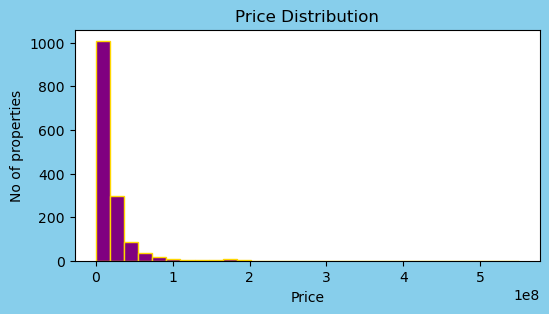

In [36]:
fig = plt.figure(figsize=(6,3),facecolor="skyblue")
plt.hist(df1["price"],bins=30,color="purple",edgecolor="gold")
plt.xlabel("Price")
plt.ylabel("No of properties")
plt.title("Price Distribution")
plt.show()

* Most properties fall into mid-price ranges, while few properties lie in extreme high-price segments, indicating a right-skewed price distribution.

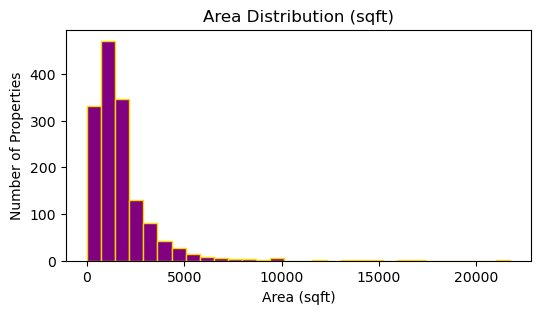

In [37]:
fig = plt.figure(figsize=(6,3))
plt.hist(df1["area_sqft"], bins=30, color="purple",edgecolor="gold")
plt.title("Area Distribution (sqft)")
plt.xlabel("Area (sqft)")
plt.ylabel("Number of Properties")
plt.show()

* Most properties have moderate built-up area, showing standard residential configurations dominate the market.

property_type
Carpet Area    788
Super Area     410
Plot Area      273
Built Area       9
Name: count, dtype: int64


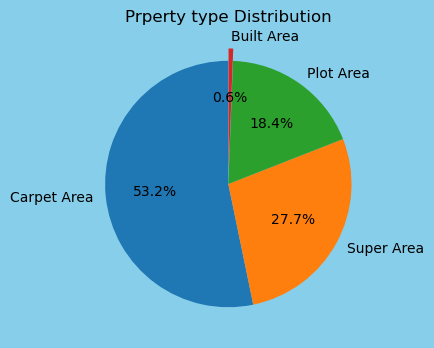

In [11]:
print(df1["property_type"].value_counts())
plt.figure(figsize=(6,4),facecolor="skyblue")
plt.pie(df1["property_type"].value_counts(),
        labels=df1["property_type"].value_counts().index,autopct="%1.1f%%",
        explode=[0.0,0.0,0.0,0.1],startangle=90)
plt.title("Prperty type Distribution")
plt.show()

* Certain property types dominate the supply, indicating market preference patterns.

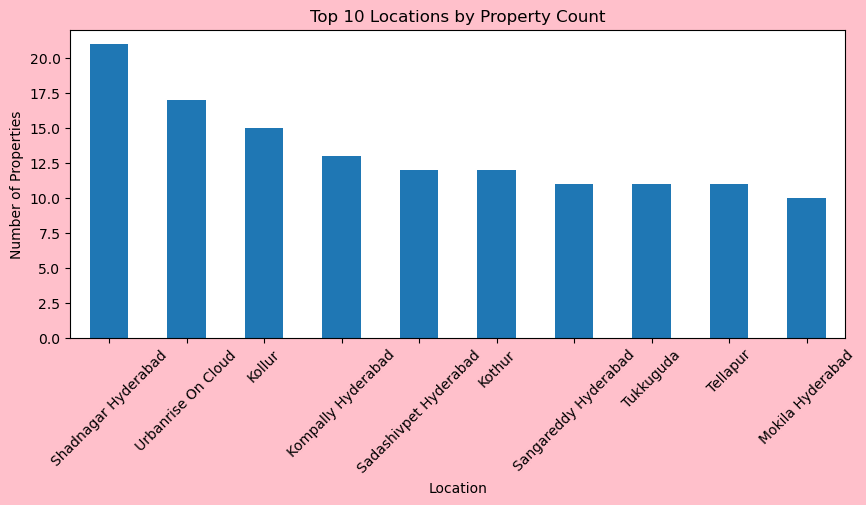

In [39]:
fig = plt.figure(figsize=(10,4),facecolor="pink")
top_locations = df1["location"].value_counts().head(10)
top_locations.plot(kind="bar")
plt.title("Top 10 Locations by Property Count")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.ylabel("Number of Properties")
plt.show()


* Listings are concentrated in specific locations, showing demand clustering in major residential zones.

budget_category
Affordable    509
Mid-Range     487
Premium       373
Low Budget     82
Luxury         29
Name: count, dtype: int64


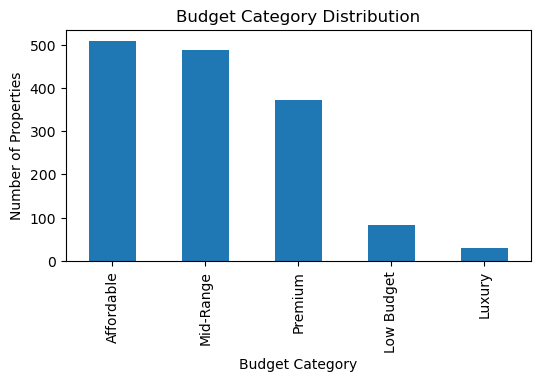

In [13]:
print(df1["budget_category"].value_counts())
plt.figure(figsize=(6,3))
df1["budget_category"].value_counts().plot(kind="bar")
plt.title("Budget Category Distribution")
plt.xlabel("Budget Category")
plt.ylabel("Number of Properties")
plt.show()


* Properties are distributed across multiple budget segments. The majority of listings fall into the Affordable, Mid-Range, and Premium categories, while Luxury properties form a smaller segment, indicating a market dominated by mid-income and upper-mid-income housing.


### Bivariate Analysis

Text(0.5, 1.0, 'Area_sqft vs Price')

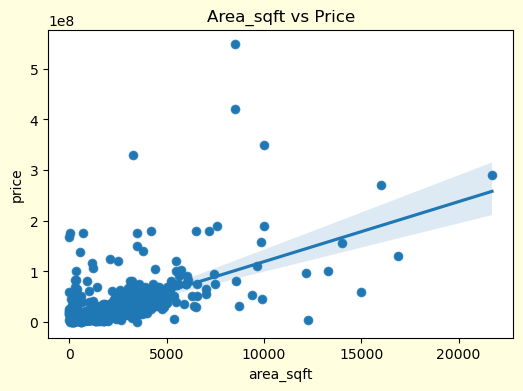

In [16]:
plt.figure(figsize=(6,4),facecolor="lightyellow")
sns.scatterplot(x=df1["area_sqft"],y=df1["price"])
sns.regplot(x=df1["area_sqft"],y=df1["price"])
plt.title("Area_sqft vs Price")

* There is a positive relationship between area and price — as area increases, property price generally increases.

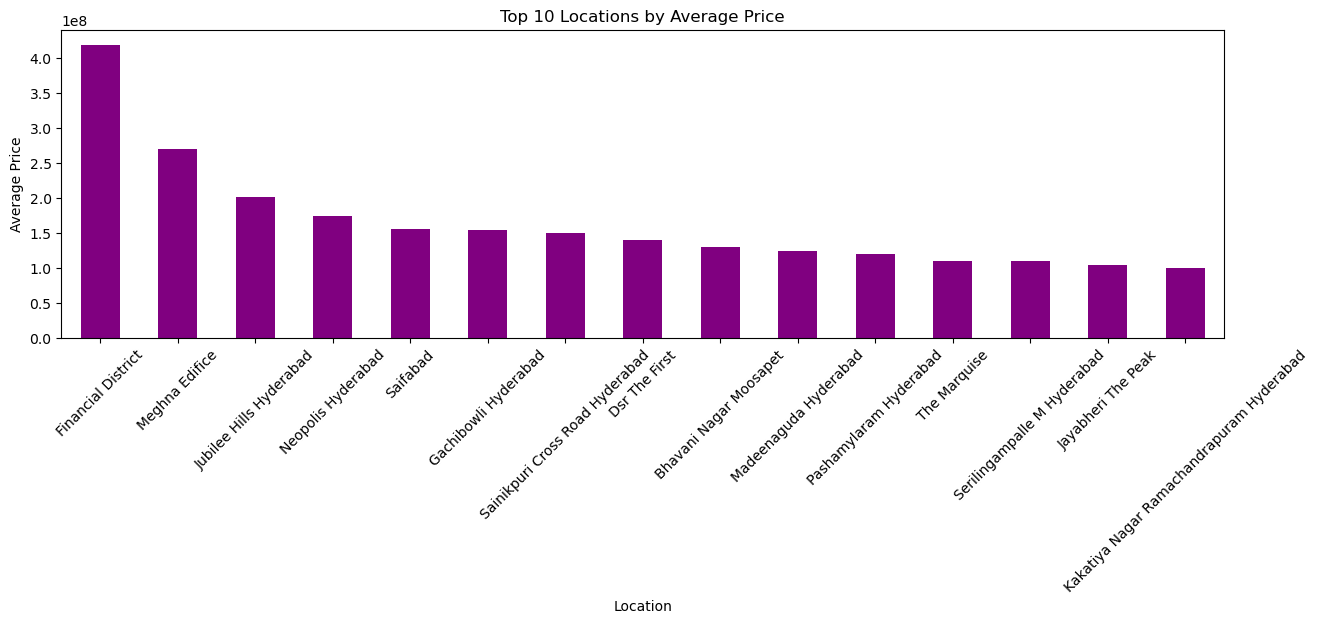

In [41]:
plt.figure(figsize=(15,4))
avg_price_loc = df1.groupby("location")["price"].mean().sort_values(ascending=False).head(15)
avg_price_loc.plot(kind="bar",color="purple")
plt.title("Top 10 Locations by Average Price")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.show()


* Certain locations command higher average prices, indicating premium residential zones.

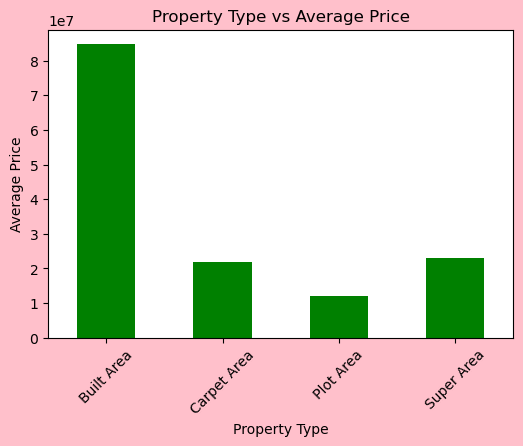

In [17]:
plt.figure(figsize=(6,4),facecolor="pink")
ptype_price = df1.groupby("property_type")["price"].mean()
ptype_price.plot(kind="bar",color="green")
plt.title("Property Type vs Average Price")
plt.xlabel("Property Type")
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.show()


* Different property types show clear price variation, reflecting value differentiation by property category.

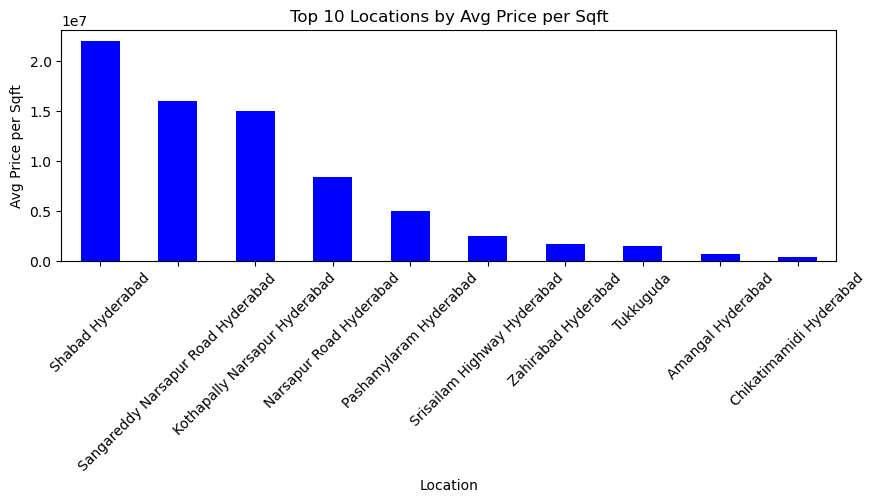

In [20]:
plt.figure(figsize=(10,3))
pps_loc = df1.groupby("location")["price_per_sqft"].mean().sort_values(ascending=False).head(10)
pps_loc.plot(kind="bar",color="blue")
plt.title("Top 10 Locations by Avg Price per Sqft")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.ylabel("Avg Price per Sqft")
plt.show()


* High price-per-sqft locations represent premium urban zones and high-demand residential areas.

### Multivariate Analysis

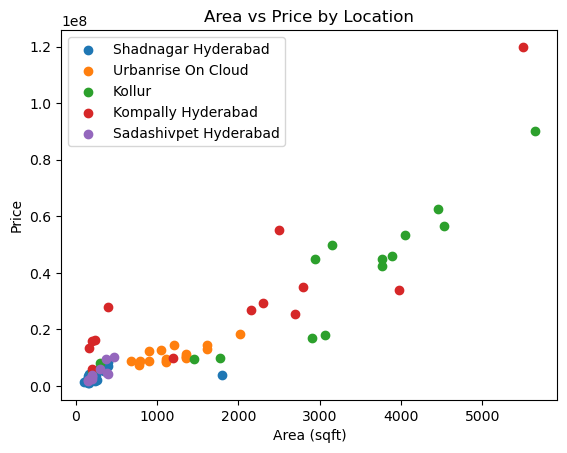

In [44]:
top_locs = df1["location"].value_counts().head(5).index
df_multi = df1[df1["location"].isin(top_locs)]

plt.figure()
for loc in top_locs:
    temp = df_multi[df_multi["location"] == loc]
    plt.scatter(temp["area_sqft"], temp["price"], label=loc)

plt.title("Area vs Price by Location")
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.legend()
plt.show()


* For the same area, prices differ across locations, showing location-based valuation impact.

In [50]:
pivot = df1.pivot_table(values="price", index="property_type", columns="budget_category", aggfunc="mean")

pivot


budget_category,Affordable,Low Budget,Luxury,Mid-Range,Premium
property_type,,,,,
Built Area,3.500000e+06,2.900000e+06,205600000.0,1.650000e+07,4.073333e+07
Carpet Area,7.017197e+06,2.562500e+06,212118750.0,1.479706e+07,3.830000e+07
Plot Area,5.298231e+06,2.067576e+06,151000000.0,1.487805e+07,3.814687e+07
Super Area,7.612921e+06,1.708571e+06,164250000.0,1.489942e+07,3.841185e+07


* Budget categories vary significantly across property types, showing affordability patterns.

In [23]:
multi = df1.groupby("location")[["area_sqft", "price_per_sqft"]].mean().sort_values("price_per_sqft", ascending=False).head(10)
multi


,area_sqft,price_per_sqft
location,,
Shabad Hyderabad,1.000000,2.200000e+07
Sangareddy Narsapur Road Hyderabad,1.000000,1.600000e+07
Kothapally Narsapur Hyderabad,1.000000,1.500000e+07
Narsapur Road Hyderabad,3.000000,8.400000e+06
Pashamylaram Hyderabad,3603.000000,5.012500e+06
Srisailam Highway Hyderabad,158.000000,2.513147e+06
Zahirabad Hyderabad,107.500000,1.756818e+06
Tukkuguda,1580.636364,1.538914e+06
Amangal Hyderabad,561.333333,7.067427e+05


* Some locations have high price-per-sqft despite moderate area sizes, indicating high land value zones.

<Axes: >

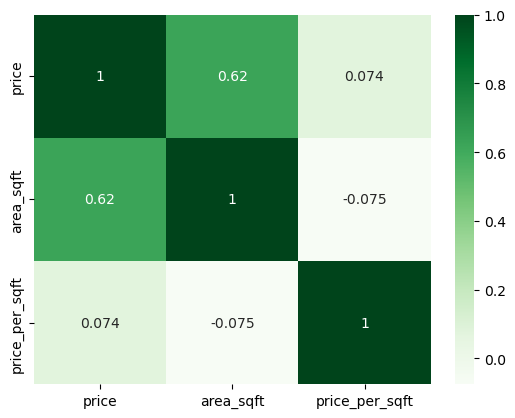

In [26]:
sns.heatmap(df1[["price","area_sqft","price_per_sqft"]].corr(), annot=True, cmap="Greens")

* The heatmap shows that price strongly depends on area, while price per square foot is largely independent of size, indicating that location and demand play a more important role in determining unit pricing.

<Figure size 600x300 with 0 Axes>

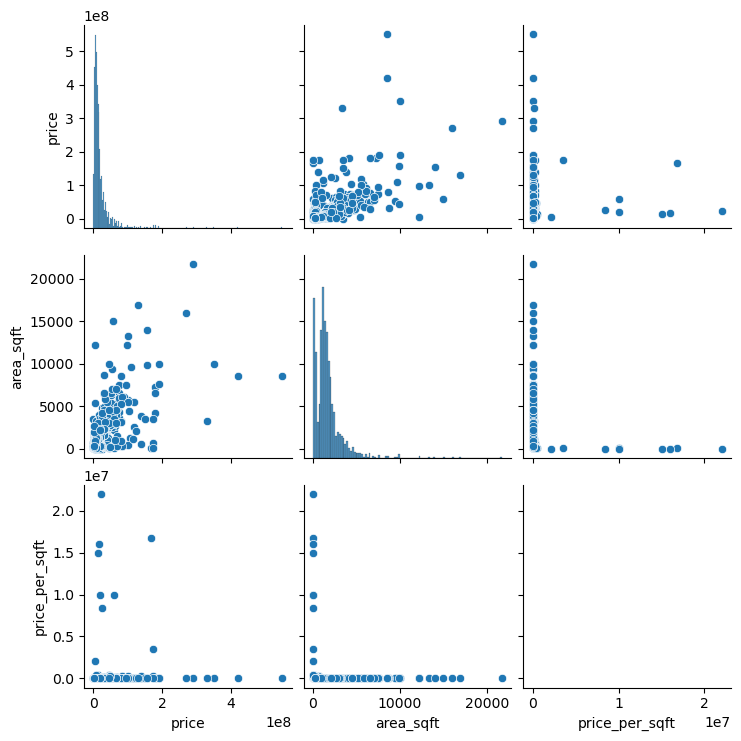

In [29]:
# Pair plot
plt.figure(figsize=(6,3))
sns.pairplot(df1)